<a href="https://colab.research.google.com/github/sap156/infinityskillshub/blob/main/Augmenting_Existing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative AI for Data Professionals
# Data Generation and Augmentation — Module 2 Part 2
# Augmenting Existing Data

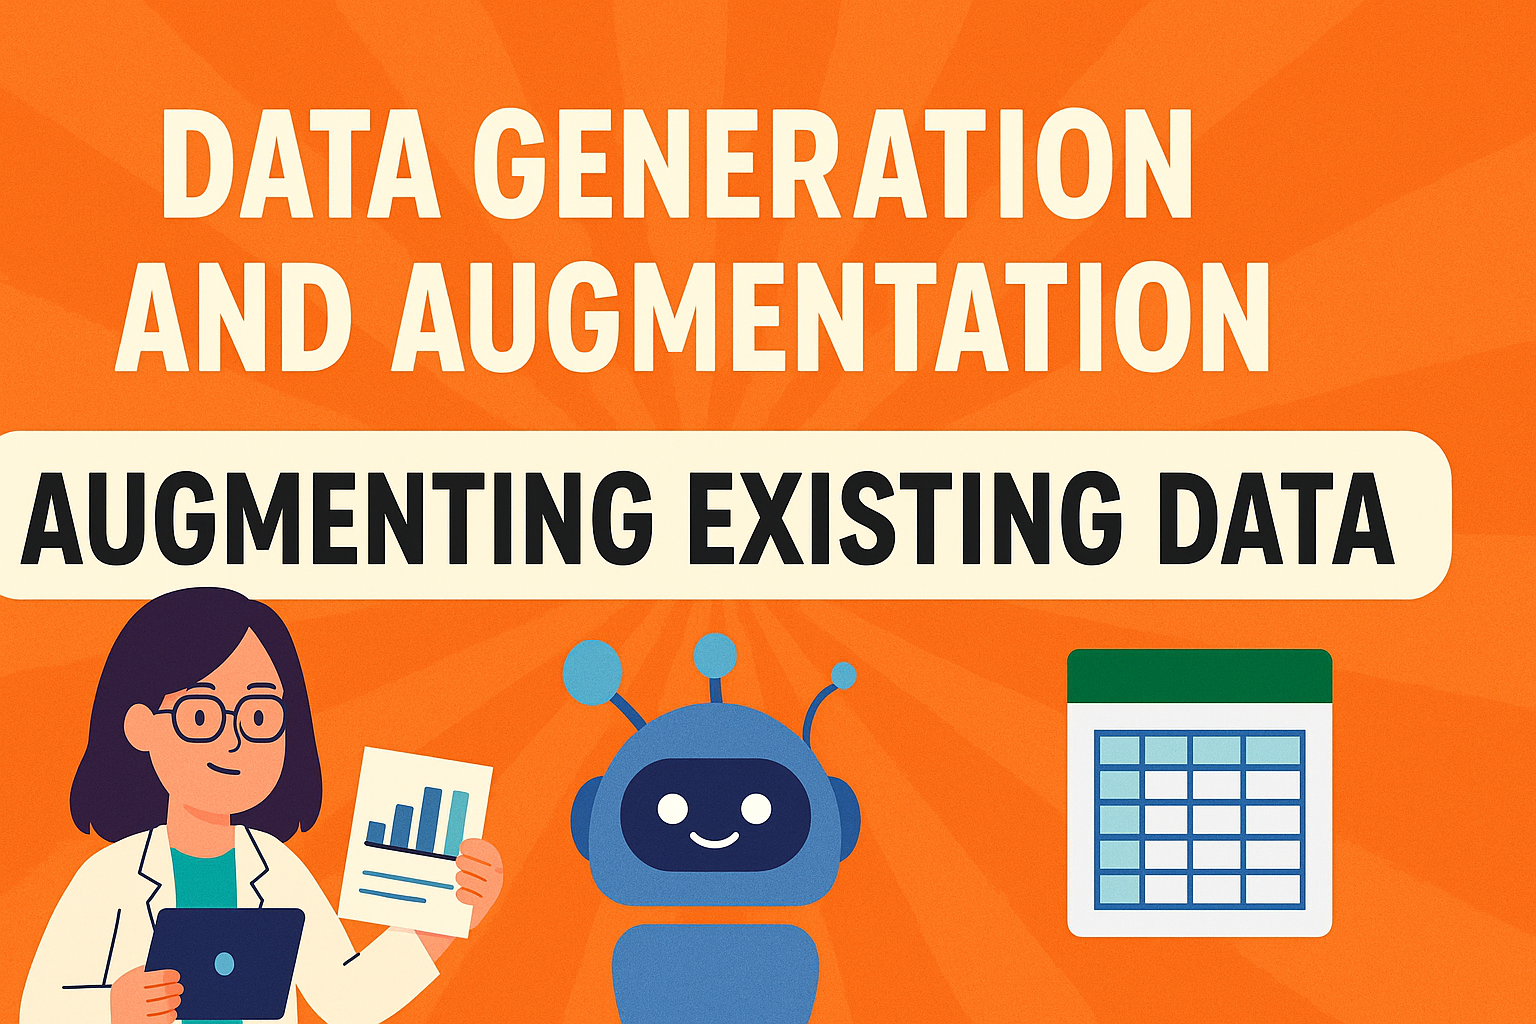

# 📈 Data Augmentation with AI

**Data augmentation is the process of expanding existing datasets to create more
comprehensive and balanced data for analysis, model training, and business applications.**

It allows data professionals to generate additional records while maintaining consistency
with the original dataset, which is particularly useful when dealing with imbalanced
datasets, data sparsity, or the need for enriched information.

**Learning Objectives:**
- ✅ Understand when and why to augment existing data
- ✅ Expand small datasets while preserving patterns
- ✅ Balance imbalanced datasets with targeted generation
- ✅ Maintain statistical relationships in numerical data
- ✅ Generate contextually relevant additional records

# =====================================================
# 🔄 INTRODUCTION: WHY DATA AUGMENTATION MATTERS
# =====================================================


## Real-Life Scenarios for Data Augmentation

Augmenting existing data is crucial in real-life scenarios such as:

📊 **Balancing Datasets:** When training machine learning models, having an even distribution
of different categories is essential for better predictions. Augmentation helps by generating
additional samples for underrepresented categories.

📈 **Expanding Limited Datasets:** Sometimes, the available data is insufficient for thorough
analysis. Generative AI can create meaningful additional records based on existing data.

🔗 **Ensuring Consistency:** Augmentation preserves logical relationships within datasets,
ensuring that newly generated records follow expected trends and patterns.

🧪 **Generating Edge Cases and Anomalies:** Testing systems with various types of data,
including outliers, helps improve their robustness.

**Key Difference from Synthetic Data Generation:**
- Synthetic data = Creating from scratch
- Data augmentation = Expanding what you already have while preserving patterns

## Setting Up for Data Augmentation

**Prerequisites:** Make sure you completed the Environment Setup from Video 1

In [27]:
# Essential imports
import pandas as pd
import json
import numpy as np
from pprint import pprint
from google.colab import userdata
from openai import OpenAI

# Set up our AI client securely
client = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))

# Helper function for extracting data from nested JSON
def clean(dict_variable):
    return next(iter(dict_variable.values()))

print("✅ Environment ready for data augmentation!")

✅ Environment ready for data augmentation!


# =====================================================
# 📱 AUGMENTING PRODUCT DATA
# =====================================================

## Generating Additional Product Data

Let's start with a practical example - expanding a small product dataset while
maintaining the same patterns and structure.

**Use Case:** You have a small product catalog and need more data for testing
your recommendation engine or pricing models.

In [28]:
# Create existing dataset
existing_data = pd.DataFrame({
    'product': ['iPhone 16 Pro Max', 'Samsung S24 Ultra'],
    'price': [1200, 1500],
    'category': ['Electronics', 'Electronics']
})

print("📊 Existing Data:")
print(existing_data)
print(f"\nCurrent dataset size: {len(existing_data)} records")


📊 Existing Data:
             product  price     category
0  iPhone 16 Pro Max   1200  Electronics
1  Samsung S24 Ultra   1500  Electronics

Current dataset size: 2 records


In [29]:
def augment_product_data(existing_df, num_new_products=3):
    """
    Augment existing product data with new similar products
    """

    # Convert existing data to format suitable for AI prompt
    existing_records = existing_df.to_dict('records')

    prompt = f"""Given this product data: {existing_records},
    generate {num_new_products} completely new additional products in the same format,
    maintaining similar patterns but with different values.

    Keep the same structure and data types.
    Ensure prices are realistic for the category.
    Output as JSON with 'products' array."""

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        response_format={"type": "json_object"}
    )

    return json.loads(response.choices[0].message.content)

In [30]:
# Generate additional products
print("\n🎲 Generating additional products...")
new_products_data = augment_product_data(existing_data, 5)

print("\n📋 Generated New Products (JSON):")
print(json.dumps(new_products_data, indent=2))

# Convert to DataFrame
new_products_df = pd.DataFrame(new_products_data['products'])
print("\n📊 Generated New Products (DataFrame):")
print(new_products_df)

# Combine original and augmented data
augmented_products_df = pd.concat([existing_data, new_products_df], ignore_index=True)

print(f"\n📈 Augmented Dataset:")
print(augmented_products_df)
print(f"\nDataset expanded from {len(existing_data)} to {len(augmented_products_df)} records")



🎲 Generating additional products...

📋 Generated New Products (JSON):
{
  "products": [
    {
      "product": "Google Pixel 8 Pro",
      "price": 1100,
      "category": "Electronics"
    },
    {
      "product": "OnePlus 11T",
      "price": 899,
      "category": "Electronics"
    },
    {
      "product": "Sony WH-1000XM5 Headphones",
      "price": 350,
      "category": "Electronics"
    },
    {
      "product": "Apple Watch Series 9",
      "price": 800,
      "category": "Electronics"
    },
    {
      "product": "Samsung Galaxy Buds Pro 2",
      "price": 200,
      "category": "Electronics"
    }
  ]
}

📊 Generated New Products (DataFrame):
                      product  price     category
0          Google Pixel 8 Pro   1100  Electronics
1                 OnePlus 11T    899  Electronics
2  Sony WH-1000XM5 Headphones    350  Electronics
3        Apple Watch Series 9    800  Electronics
4   Samsung Galaxy Buds Pro 2    200  Electronics

📈 Augmented Dataset:
              

🎯 **Key Observations:**

Notice how the AI maintained:
- Similar price ranges appropriate for electronics
- Consistent category classification
- Realistic product names that fit the pattern
- Proper data structure and types

This contextual intelligence ensures the augmented data feels natural and usable!

# =====================================================
# 📊 AUGMENTING NUMERICAL DATA WITH RELATIONSHIPS
# =====================================================


## Preserving Statistical Relationships

Traditional data augmentation may not preserve important relationships within datasets,
such as age-income correlations. Generative AI can maintain these relationships while
generating new data points.

**Use Case:** You have customer demographic data and need more samples for analysis
while preserving realistic age-income relationships.

In [31]:
# Original dataset with relationships
original_data = [
    {"id": 1, "age": 25, "income": 50000},
    {"id": 2, "age": 40, "income": 75000}
]

print("📊 Original Data:")
print(json.dumps(original_data, indent=2))

# Convert to DataFrame for analysis
original_df = pd.DataFrame(original_data)
print(f"\nOriginal correlation (age vs income): {original_df['age'].corr(original_df['income']):.3f}")


📊 Original Data:
[
  {
    "id": 1,
    "age": 25,
    "income": 50000
  },
  {
    "id": 2,
    "age": 40,
    "income": 75000
  }
]

Original correlation (age vs income): 1.000


In [32]:
def augment_numerical_data(original_data, num_new_records=3):
    """
    Augment numerical data while preserving relationships
    """
    prompt = f"""Generate {num_new_records} new data points similar to these,
    maintaining realistic relationships between age and income.

    Key requirements:
    - Preserve the positive correlation between age and income
    - Use realistic age ranges (20-65)
    - Use realistic income ranges ($30K-$120K)
    - Increment IDs appropriately

    Original data: {json.dumps(original_data)}

    Output as JSON with 'records' array."""

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        response_format={"type": "json_object"}
    )

    return json.loads(response.choices[0].message.content)

In [33]:
# Generate additional records
print("\n🎲 Generating additional records...")
new_data_response = augment_numerical_data(original_data, 3)
new_data = new_data_response['records']

print("\n📋 Generated New Records:")
print(json.dumps(new_data, indent=2))

# Combine original and new data
augmented_data = original_data + new_data

print("\n📊 Complete Augmented Dataset:")
augmented_df = pd.DataFrame(augmented_data).sort_values('age')
print(augmented_df)


🎲 Generating additional records...

📋 Generated New Records:
[
  {
    "id": 3,
    "age": 30,
    "income": 60000
  },
  {
    "id": 4,
    "age": 50,
    "income": 90000
  },
  {
    "id": 5,
    "age": 65,
    "income": 110000
  }
]

📊 Complete Augmented Dataset:
   id  age  income
0   1   25   50000
2   3   30   60000
1   2   40   75000
3   4   50   90000
4   5   65  110000


In [ ]:
# Analyze relationship preservation
print(f"\n🔍 Relationship Analysis:")
print(f"- Original correlation: {original_df['age'].corr(original_df['income']):.3f}")
print(f"- Augmented correlation: {augmented_df['age'].corr(augmented_df['income']):.3f}")
print(f"- Age range: {augmented_df['age'].min()} - {augmented_df['age'].max()}")
print(f"- Income range: ${augmented_df['income'].min():,} - ${augmented_df['income'].max():,}")


🎯 **Relationship Preservation Success:**

The AI successfully maintained the positive correlation between age and income while:
- Generating realistic age and income values
- Preserving the overall statistical relationship
- Creating diverse but consistent data points
- Following the existing data patterns